## Transform and reconstruct the data images

In [139]:
import cv2
import glob
import os
from PIL import Image
import numpy as np
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

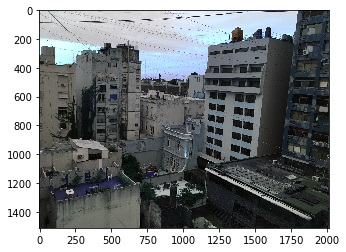

512*512 pixels


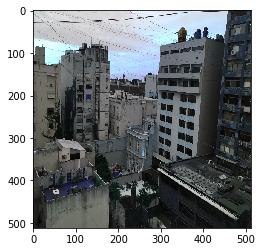

250*250 pixels


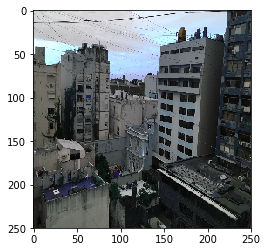

In [14]:
#Choose the resize dimension
test_image = cv2.imread('C:/Users/H/Desktop/CS classes/CS156/CS156 Assignment/LBA/IMG_0373.JPG')
plt.imshow(test_image)
plt.show()

print('512*512 pixels')
new_img = cv2.resize(src = test_image, dsize = (512,512))
normalized_img = cv2.normalize(new_img, alpha = 0.0, beta = 1.0,
                               dst = new_img, dtype=cv2.CV_32F, norm_type=cv2.NORM_MINMAX)
plt.imshow(normalized_img)
plt.show()

print('250*250 pixels')
new_img = cv2.resize(src = test_image, dsize = (250,250))
normalized_img = cv2.normalize(new_img, alpha = 0.0, beta = 1.0,
                               dst = new_img, dtype=cv2.CV_32F, norm_type=cv2.NORM_MINMAX)
plt.imshow(normalized_img)
plt.show()

In [16]:
#Collect all the link to images, open them and flatten them into arrays
paths = ["C:/Users/H/Desktop/CS classes/CS156/CS156 Assignment/LBA"]
dataset = []

for pathname in paths:
    final = os.path.join(pathname,'*JPG')
    images = glob.glob(final)
    
    for i in range(len(images)):
        img = Image.open(images[i])
        next_img = img.resize((250,250), Image.ANTIALIAS)
        dataset.append(np.array(next_img).flatten())

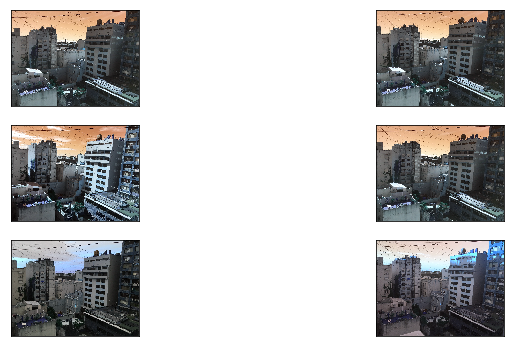

In [73]:
#Open some of the pictures 
samples = np.random.choice(images, size=6, replace=False)

position = 1
plt.figure(figsize=(12,6))
for x in samples: 
    plt.subplot(3,2,position)
    pic = cv2.imread (x)
    plt.imshow(pic)
    plt.xticks([]), plt.yticks([])
    position +=1
plt.show()

## Apply PCA to transform the images

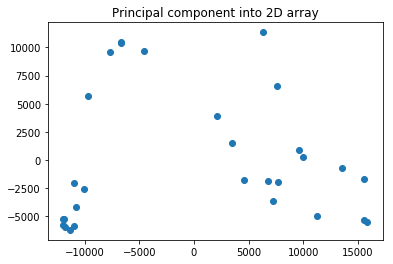

In [90]:
pca = PCA(2)
pca.fit(dataset)
transformed = pca.transform(dataset)
plt.scatter(transformed[:,0], transformed[:,1])
plt.title('Principal component into 2D array')
plt.show()

In [91]:
#This tells us about the explanation power of the transformation. The 1st component explains 34.7% of the images
#and the 2nd component explains 11.3% of the images. In total, it explains only 46% of the dataset. 
print (pca.explained_variance_ratio_)

[0.3473222  0.11337799]


## Create images that from the transformed images

Original images


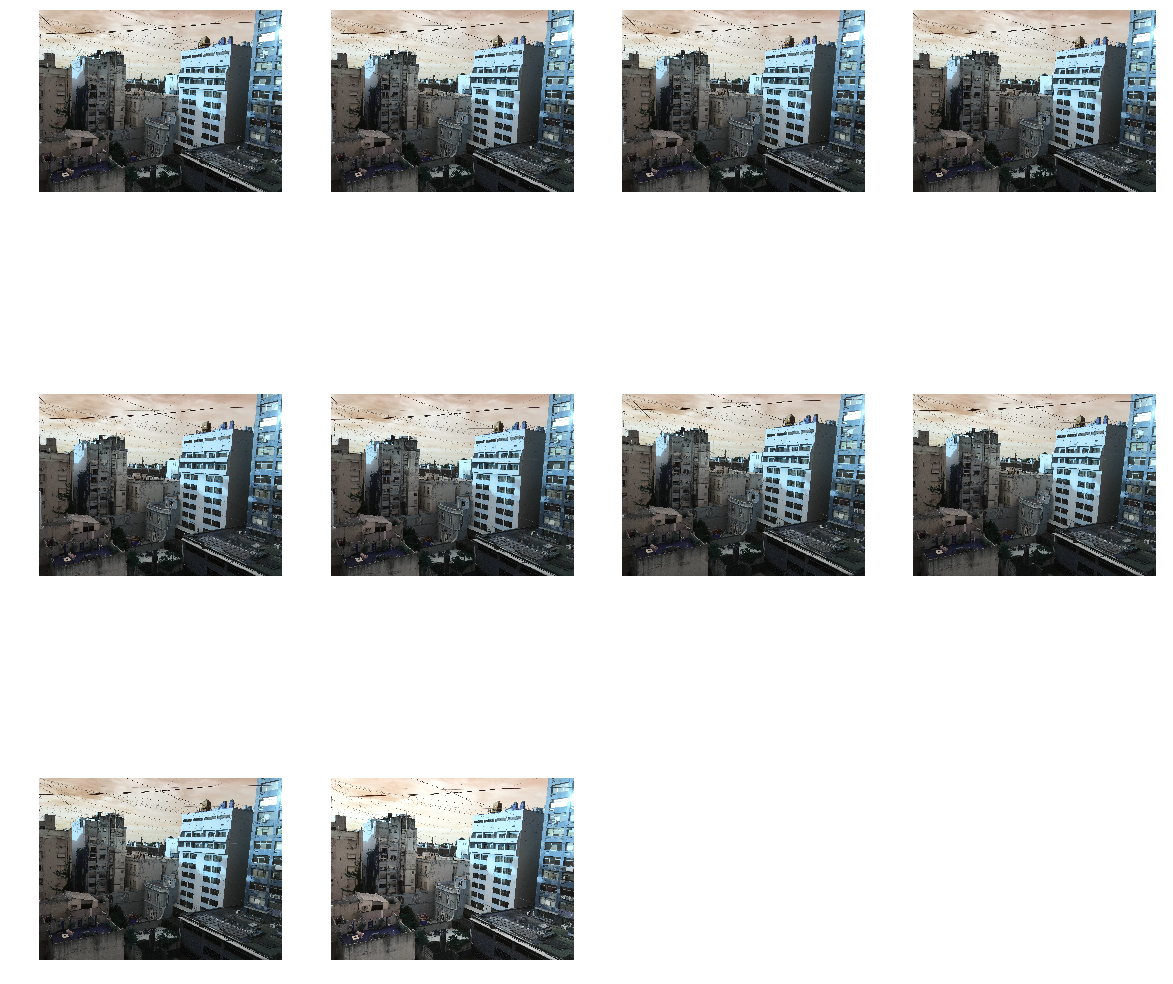

----------------------------------------------------------------------------------------------------
Reconstructed images


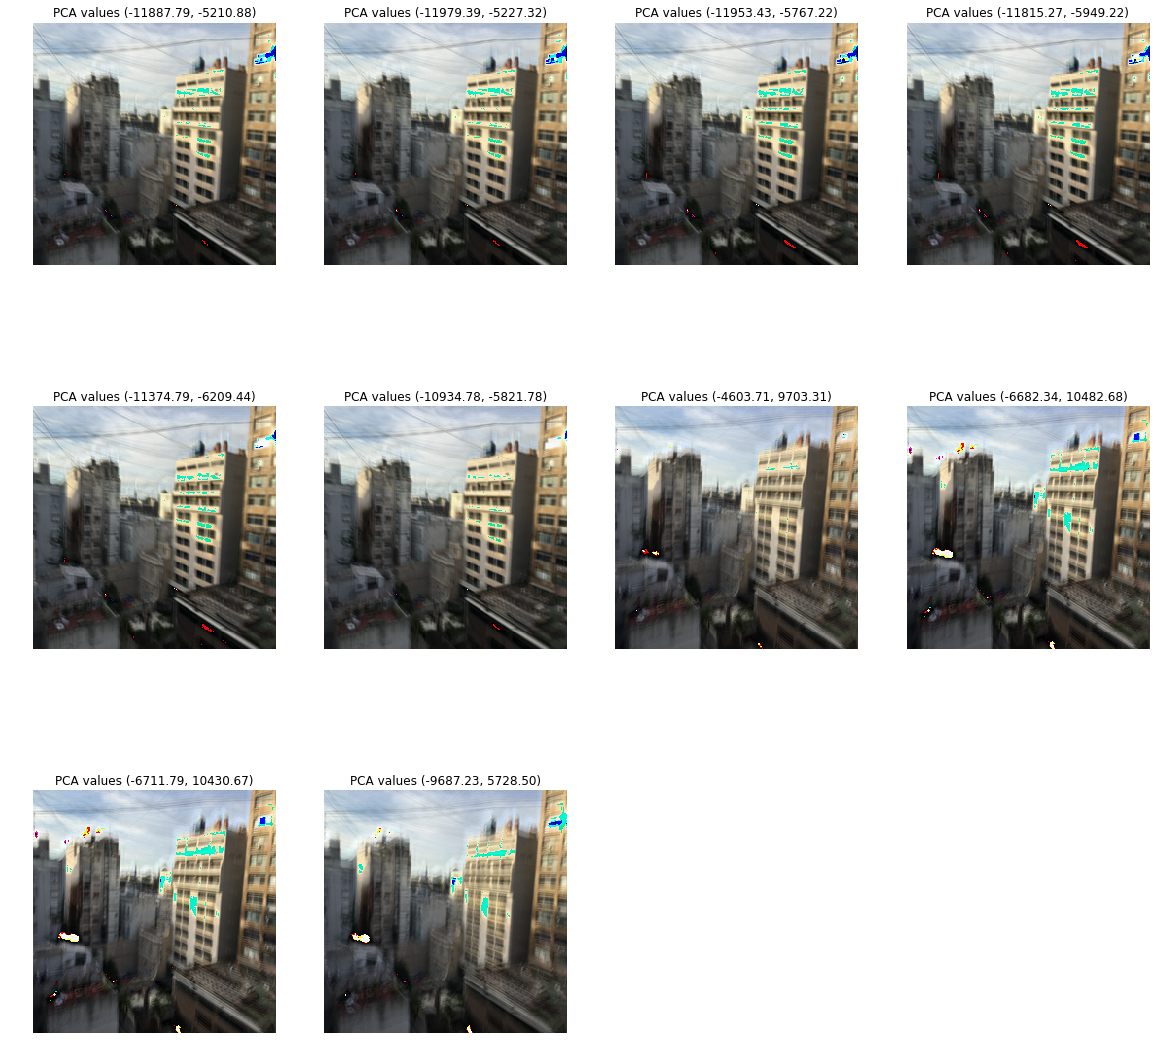

In [145]:
arr_reconstructed_img = pca.inverse_transform(transformed)
arr_reconstructed_img = arr_reconstructed_img.astype(np.uint8)

print ('Original images')
position = 1
fig = plt.figure(figsize=(20,20))
for x in range (1,11): 
    fig.add_subplot(3,4,x)   
    pic = cv2.imread (images[x])
    plt.imshow(pic)
    plt.axis('off')
    position +=1
plt.show()

print ('-----'*20)
print ('Reconstructed images')
fig = plt.figure(figsize=(20,20))
gs1 = gridspec.GridSpec(4, 4)
gs1.update(wspace=0.025, hspace=0.05) # set the spacing between axes. 
for i in range(1, 11):
    fig.add_subplot(3,4,i)    
    img_arr = np.reshape(arr_reconstructed_img[i],(250,250,3))
    plt.axis('off')
    plt.title ('PCA values ({0:.2f}, {1:.2f})'.format (transformed[i][0], transformed [i][1]))
    plt.imshow(img_arr)

## Create images with random points that are far away from the training points

In [93]:
import random
random_points = []
for i in range (4):
    random_point = (random.choice(range(-10000, 15000, 1000)), random.choice(range(-5000, 10000, 1000)))
    random_points.append(random_point)

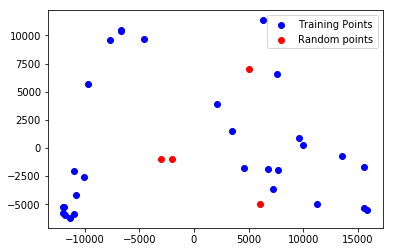

In [94]:
# Plot the known points
random = np.array (random_points)
plt.scatter(transformed[:, 0], transformed[:, 1], label= 'Training Points', color = 'blue')
plt.scatter(random[:,0], random[:,1], label = 'Random points', color = 'red')
plt.legend(loc='best', bbox_to_anchor=(1, 1), ncol=1)
plt.show()

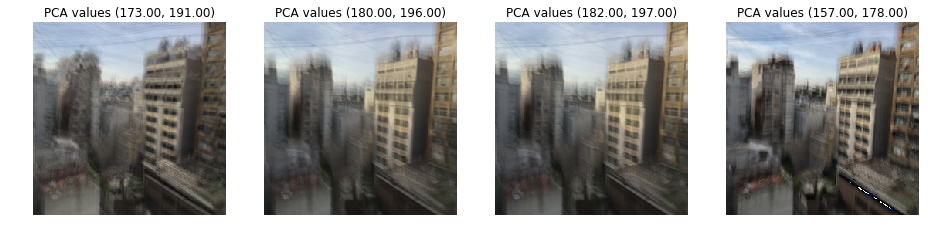

In [95]:
random_reconstructed = pca.inverse_transform(random)
random_reconstructed = random_reconstructed.astype(np.uint8)

fig = plt.figure(figsize=(20,20))
count = 1
for i in range(0, 4):
    ax = fig.add_subplot(1, 5, count)
    img_arr = np.reshape(random_reconstructed[i],(250,250,3))
    plt.imshow(img_arr)
    plt.title ('PCA values ({0:.2f}, {1:.2f})'.format (random_reconstructed[count-1][0], random_reconstructed [count-1][1]))
    plt.axis('off')
    count +=1

# Transform images into 3D array

In [96]:
pca_3D = PCA(3)
pca_3D.fit(dataset)
transformed_3D = pca_3D.transform(dataset)

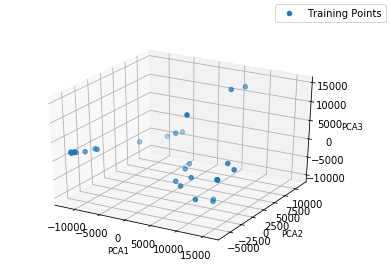

In [97]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
plot = fig.gca(projection='3d')
plot.scatter(transformed_3D[:, 0], transformed_3D[:, 1], transformed_3D[:, 2], label='Training Points')
plot.set_xlabel('PCA1', fontsize='small')
plot.set_ylabel('PCA2', fontsize='small')
plot.set_zlabel('PCA3', fontsize='small')
fig.legend()

In [98]:
#This tells us about the explanation power of the transformation. The 1st component explains 34.7% of the images
#the 2nd component explains 11.3% of the images, and the 3rd explains 11%. In total, it explains only 57% of the dataset. 
print (pca_3D.explained_variance_ratio_)

[0.3473222  0.11337799 0.10912958]


## Reconstruct the transformed images

Original images


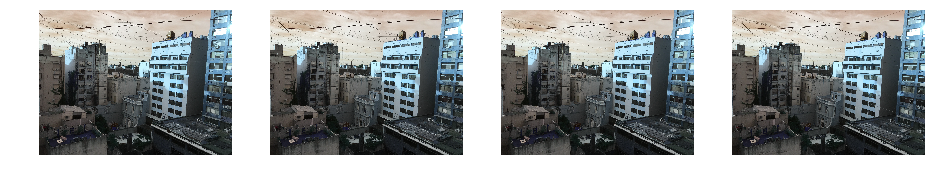

----------------------------------------------------------------------------------------------------
Reconstructed images


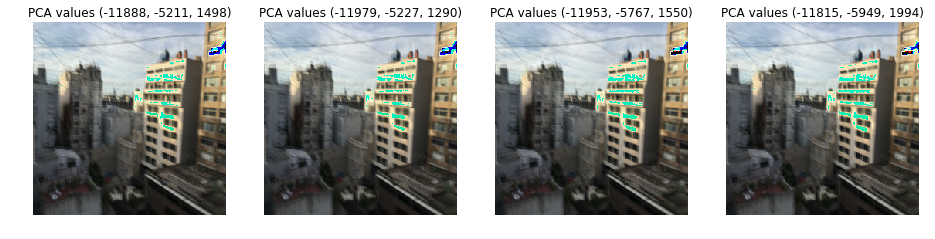

In [100]:
arr_reconstructed_img_3D = pca_3D.inverse_transform(transformed_3D)
arr_reconstructed_img_3D = arr_reconstructed_img_3D.astype(np.uint8)

print ('Original images')
position = 1
fig = plt.figure(figsize=(20,20))
for x in range (1,5): 
    fig.add_subplot(1,5,x)   
    pic = cv2.imread (images[x])
    plt.imshow(pic)
    plt.axis('off')
    position +=1
plt.show()

print ('-----'*20)
print ('Reconstructed images')
fig = plt.figure(figsize=(20,20))
for i in range(1, 5):
    fig.add_subplot(1,5,i)    
    img_arr = np.reshape(arr_reconstructed_img_3D[i],(250,250,3))
    plt.axis('off')
    plt.title ('PCA values ({0:.0f}, {1:.0f}, {2:.0f})'.format (transformed_3D[i][0], transformed_3D[i][1], transformed_3D[i][2]))
    plt.imshow(img_arr)

## Construct images from a few random points

In [131]:
import random
random_points_3D = []
for i in range (4):
    random_point = (random.choice(range(-10000, 15000, 1000)), 
                       random.choice(range(-5000, 10000, 1000)), random.choice(range(-10000, 15000, 1000)))
    random_points_3D.append(random_point)
random_points_3D = np.array (random_points_3D)

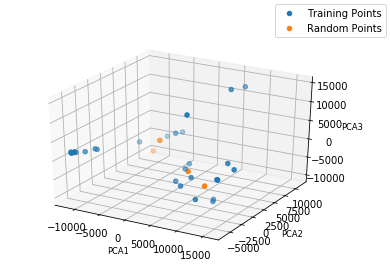

In [132]:
fig = plt.figure()
plot = fig.gca(projection='3d')
plot.scatter(transformed_3D[:, 0], transformed_3D[:, 1], transformed_3D[:, 2], label='Training Points')
plot.scatter(random_points_3D[:, 0], random_points_3D[:, 1], random_points_3D[:, 2], label='Random Points')
plot.set_xlabel('PCA1', fontsize='small')
plot.set_ylabel('PCA2', fontsize='small')
plot.set_zlabel('PCA3', fontsize='small')
fig.legend()

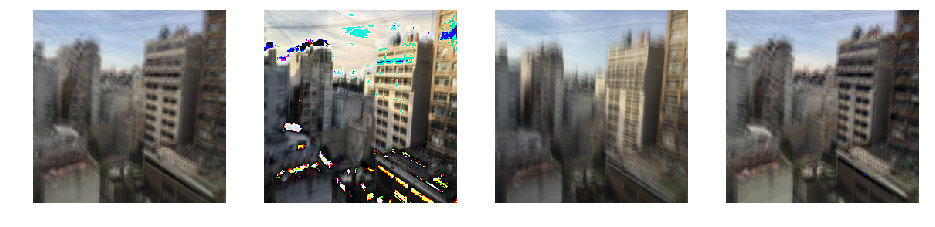

In [134]:
random_reconstructed_3D = pca_3D.inverse_transform(random_points_3D)
random_reconstructed_3D = random_reconstructed_3D.astype(np.uint8)

fig = plt.figure(figsize=(20,20))
count = 1
for i in range(0, 4):
    ax = fig.add_subplot(1, 5, count)
    img_arr = np.reshape(random_reconstructed_3D[i],(250,250,3))
    plt.imshow(img_arr)
    plt.axis('off')
    count +=1